In [9]:
#load required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load dataset
eq = pd.read_csv("C:\\Users\\12162\\Documents\\BU\\DSC 350\\Week 8\\data\\earthquakes.csv")
eq.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


Text(0.5, 0.98, 'Correlation between earthquake magnitude and a tsunami with `mb` magType')

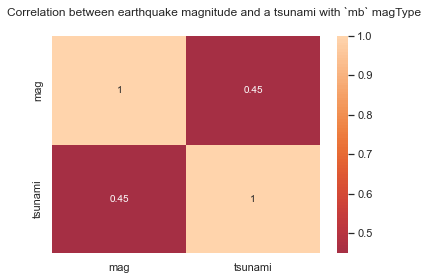

In [10]:
#Question 1
#Implementing heatmap
sns.heatmap(
    eq.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0
)
plt.suptitle('Correlation between earthquake magnitude and a tsunami with `mb` magType')

In [12]:
#Question 2
#Load dataset
fb = pd.read_csv("C:\\Users\\12162\\Documents\\BU\\DSC 350\\Week 8\\data\\fb_stock_prices_2018.csv", index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

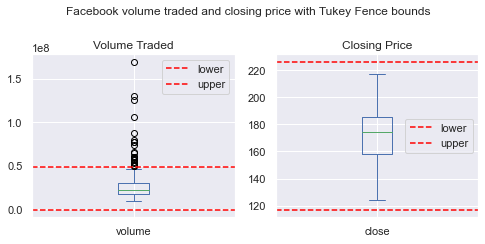

In [13]:
#Create a box plot of Facebook volume traded and closing prices
cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

#Draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5
axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='red', 
            linestyle='dashed',
            label=name
        )
        ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

Text(0.5, 1.1, 'Facebook volume traded and closing price with shaded Tukey Fence')

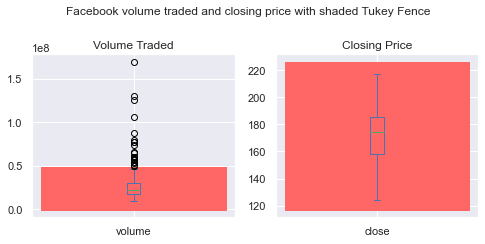

In [14]:
#Question 3
cols = ['volume', 'close']
subset = fb[cols]

#Fill in the area between the bounds in the plot from question #2
quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    ax.fill_between(
        [0,2],
        lower,
        upper, 
        color='#ff6666'
    )
plt.suptitle('Facebook volume traded and closing price with shaded Tukey Fence', y=1.1)

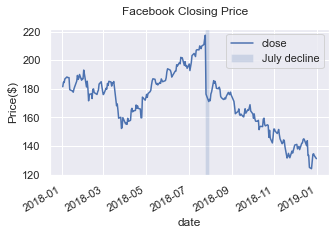

In [15]:
#Question 4
#Shade a rectangle which marks the large decline in Facebook price on a lineplot of the closing price.
fb.close.plot(kind='line', figsize=(5, 3))
plt.axvspan('2018-07-25', '2018-07-31', alpha=0.2, label='July decline')
plt.ylabel('Price($)')
plt.suptitle('Facebook Closing Price')
plt.legend()

Text(0.5, 0.98, 'Facebook Closing Price')

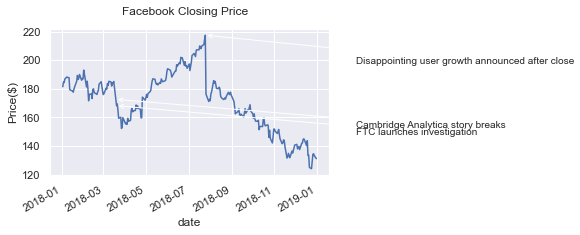

In [20]:
#Question 5
#Annotate three events on a line plot of the closing price
fb.close.plot(kind='line', figsize=(5, 3))
notes = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]
for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -20, 1)
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price($)')
plt.suptitle('Facebook Closing Price')

In [23]:
#Question 6
#Load required library
import itertools
from matplotlib import cm

#Modify the reg_resid_plots() function to use a matplotlib colormap
def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns 
    in the data.

    Parameters:
        - data: A pandas DataFrame
    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count)
    )

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(
                x=x, 
                y=y,
                data=data,
                ax=subplot,
                color=color
            )
    plt.close()
    return fig

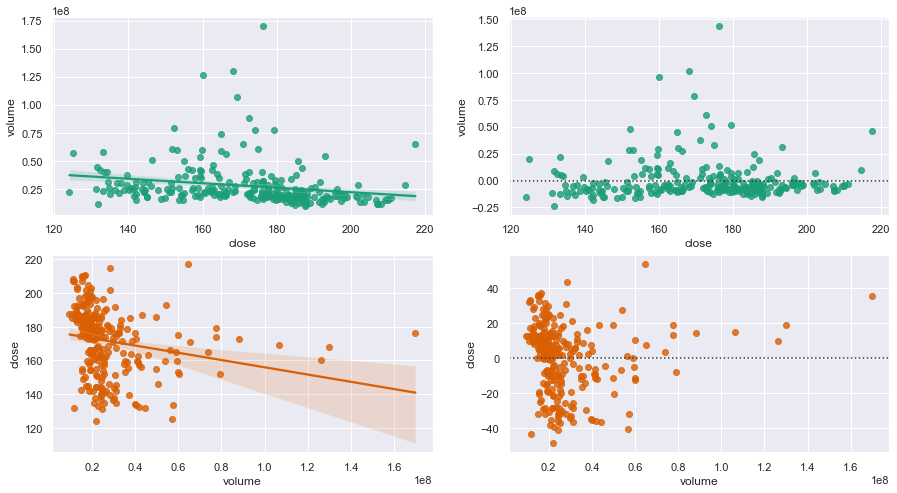

In [22]:
reg_resid_plots(fb[['close', 'volume']])